In [14]:
import jieba

content = '四海之内皆兄弟'

results = jieba.cut(content, cut_all=False)
print(results) # 将返回一个生成器对象

<generator object Tokenizer.cut at 0x14f761bc0>


In [15]:
results = jieba.lcut(content, cut_all=False)
print(results) # 将返回一个列表

['四海之内皆兄弟']


In [16]:
results = jieba.lcut(content, cut_all=True)
print(results)

['四海', '四海之内', '四海之内皆兄弟', '之内', '皆', '兄弟']


In [17]:
results = jieba.lcut_for_search(content)
print(results)

['四海', '之内', '兄弟', '四海之内皆兄弟']


In [18]:
content = "煩惱即是菩提，我暫且不提"
results = jieba.lcut(content, cut_all=False)
print(results)

['煩惱', '即', '是', '菩提', '，', '我', '暫且', '不', '提']


In [19]:
print(jieba.lcut("八一双鹿更名为八一南昌篮球队！"))

['八', '一双', '鹿', '更名', '为', '八一', '南昌', '篮球队', '！']


In [20]:
jieba.load_userdict("./userdict.txt")
print(jieba.lcut("八一双鹿更名为八一南昌篮球队！"))

['八一双鹿', '更名', '为', '八一', '南昌', '篮球队', '！']


In [21]:
import jieba.posseg as pseg
pseg.lcut("我爱北京天安门")

[pair('我', 'r'), pair('爱', 'v'), pair('北京', 'ns'), pair('天安门', 'ns')]

In [22]:
from torchtext.vocab import vocab
from collections import Counter

vocab_set = ["唐三藏", "孙悟空", "猪八戒", "沙和尚", "白龙马"]

counter = Counter(vocab_set)
vocab_obj = vocab(counter, specials=[])
print(type(vocab_obj))
print(vocab_obj['唐三藏'])

<class 'torchtext.vocab.vocab.Vocab'>
0


In [23]:
import torch

for token in vocab_set:
    token_idx = vocab_obj[token]
    one_hot = torch.zeros(len(vocab_set))
    one_hot[token_idx] = 1
    print(token, "的one-hot编码为:", one_hot.tolist())

唐三藏 的one-hot编码为: [1.0, 0.0, 0.0, 0.0, 0.0]
孙悟空 的one-hot编码为: [0.0, 1.0, 0.0, 0.0, 0.0]
猪八戒 的one-hot编码为: [0.0, 0.0, 1.0, 0.0, 0.0]
沙和尚 的one-hot编码为: [0.0, 0.0, 0.0, 1.0, 0.0]
白龙马 的one-hot编码为: [0.0, 0.0, 0.0, 0.0, 1.0]


In [24]:
torch.save(vocab_obj, "./data/pytorch_vocab.pt")

In [25]:
loaded_vocab = torch.load("./data/pytorch_vocab.pt")
print(type(loaded_vocab))

token = "唐三藏"
idx = loaded_vocab[token]
one_hot = torch.zeros(len(vocab_set))
one_hot[idx] = 1
print(token, "的one-hot编码为:", one_hot.tolist())

<class 'torchtext.vocab.vocab.Vocab'>
唐三藏 的one-hot编码为: [1.0, 0.0, 0.0, 0.0, 0.0]


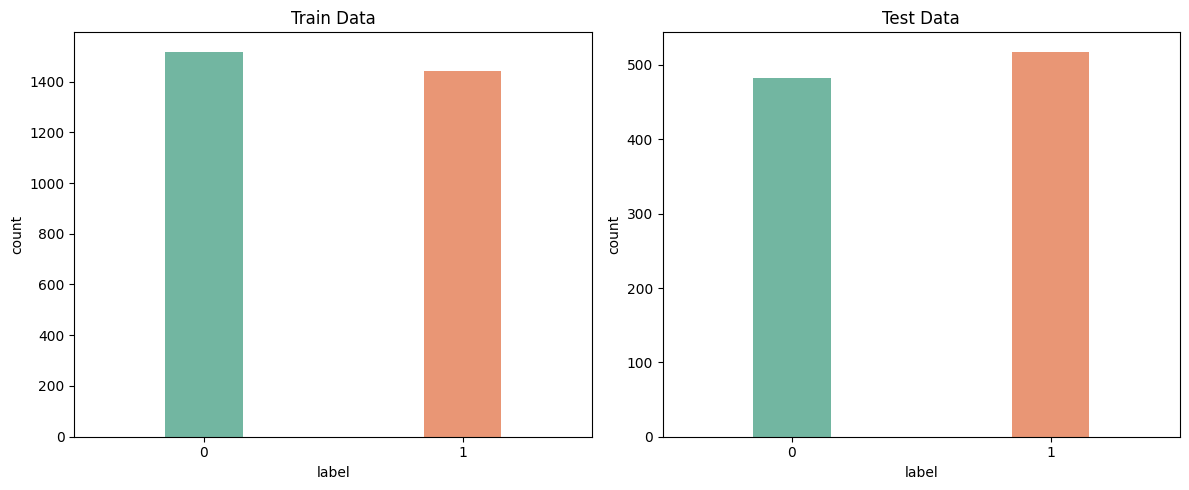

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("./samples/train.tsv", sep="\t")
test = pd.read_csv("./samples/test.tsv", sep="\t")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

config = {
    'palette': 'Set2',
    'legend': False,
    'hue': 'label',
}

sns.countplot(x='label', data=train, ax=ax1, width=0.3, **config)
ax1.set_title("Train Data")

sns.countplot(x='label', data=test, ax=ax2, width=0.3, **config)
ax2.set_title("Test Data")

plt.tight_layout()
plt.show()

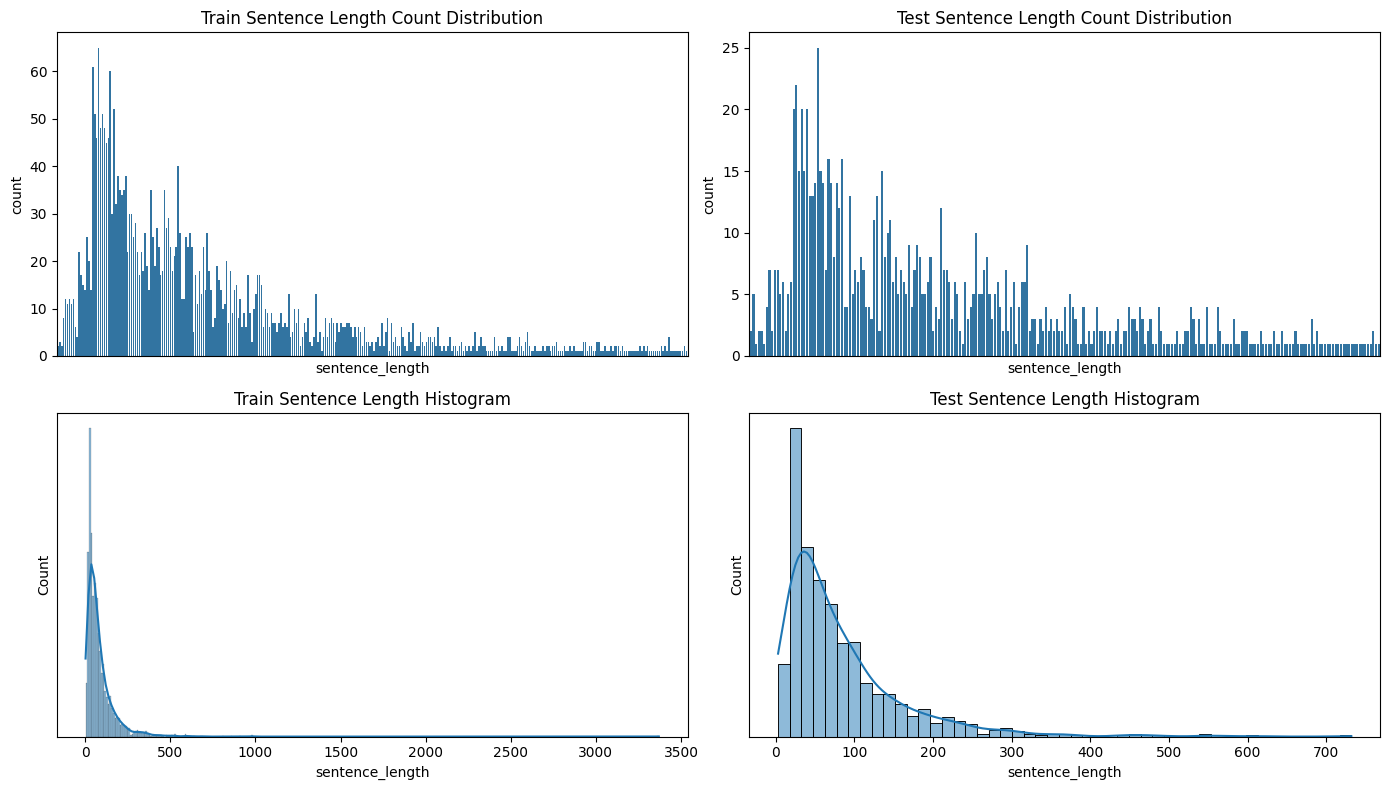

In [27]:
train["sentence_length"] = train["sentence"].map(len)
test["sentence_length"] = test["sentence"].map(len)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

sns.countplot(x="sentence_length", data=train, ax=axes[0, 0])
axes[0, 0].set_title("Train Sentence Length Count Distribution")
axes[0, 0].set_xticks([])

sns.histplot(train["sentence_length"], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Train Sentence Length Histogram")
axes[1, 0].set_yticks([])

sns.countplot(x="sentence_length", data=test, ax=axes[0, 1])
axes[0, 1].set_title("Test Sentence Length Count Distribution")
axes[0, 1].set_xticks([])

sns.histplot(test["sentence_length"], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Test Sentence Length Histogram")
axes[1, 1].set_yticks([])

plt.tight_layout()
plt.show()


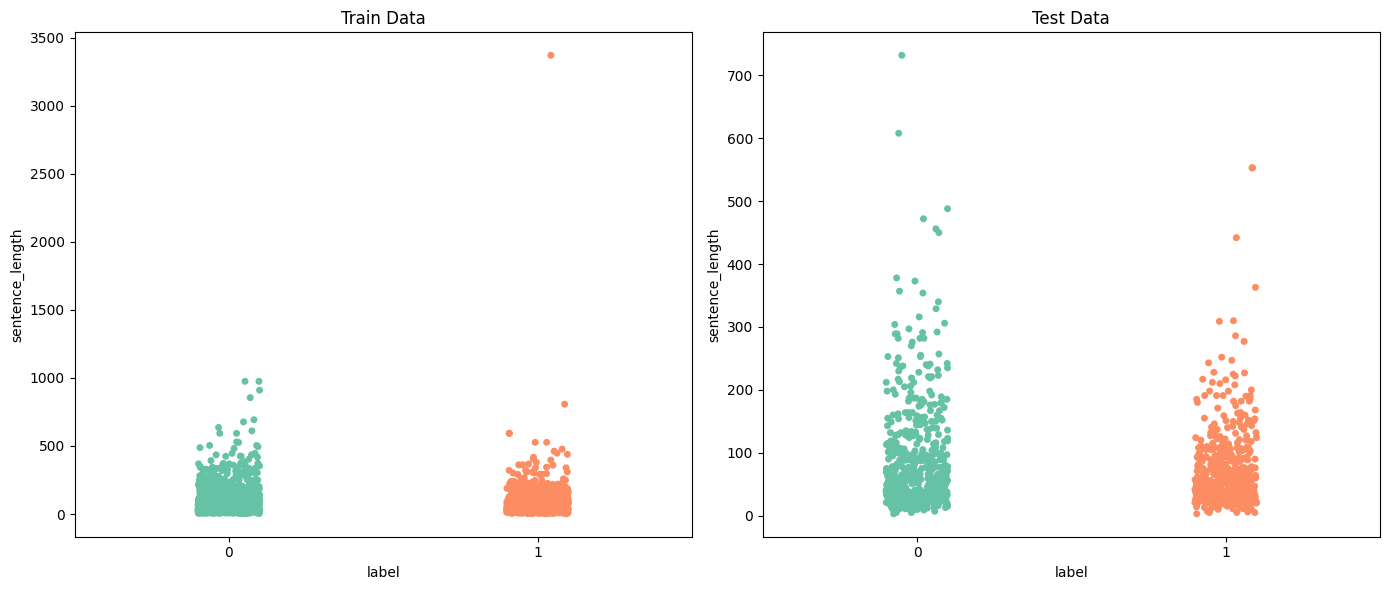

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.stripplot(y='sentence_length', x='label', data=train, ax=ax1, **config)
ax1.set_title("Train Data")

sns.stripplot(y='sentence_length', x='label', data=test, ax=ax2, **config)
ax2.set_title("Test Data")

plt.tight_layout()
plt.show()

In [29]:
import jieba

result = list(map(lambda x: jieba.lcut(x), test["sentence"]))
print(len(result))
print(result[0])

1000
['房间', '里', '有', '电脑', '，', '虽然', '房间', '的', '条件', '略显', '简陋', '，', '但', '环境', '、', '服务', '还有', '饭菜', '都', '还是', '很', '不错', '的', '。', '如果', '下次', '去', '无锡', '，', '我', '还是', '会', '选择', '这里', '的', '。']


In [30]:
from itertools import chain

train_vocab = set(chain(*map(lambda x: jieba.lcut(x), train["sentence"])))
print("训练集共包含不同词汇总数为：", len(train_vocab))

valid_vocab = set(chain(*map(lambda x: jieba.lcut(x), test["sentence"])))
print("训练集共包含不同词汇总数为：", len(valid_vocab))

训练集共包含不同词汇总数为： 12162
训练集共包含不同词汇总数为： 6857


In [31]:
import jieba.posseg as pseg

def get_a_list(text):
    r = []
    for g in pseg.lcut(text):
        if g.flag == "a":
            r.append(g.word)
    return r

train_p = train[train["label"]==1]["sentence"]
train_p_a = chain(*map(lambda x: get_a_list(x), train_p))

train_n = train[train["label"]==0]["sentence"]
train_n_a = chain(*map(lambda x: get_a_list(x), train_n))

In [32]:
from wordcloud import WordCloud

def get_word_cloud(keywords_list):
    wordcloud = WordCloud(font_path="./SimHei.ttf", max_words=100, background_color="white")
    keywords_string = " ".join(keywords_list)
    wordcloud.generate(keywords_string)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

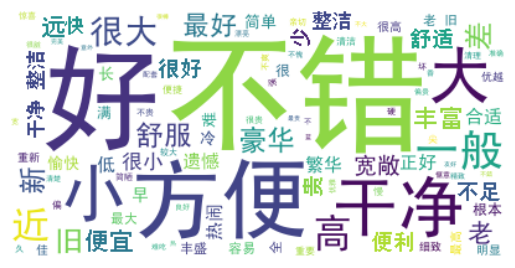

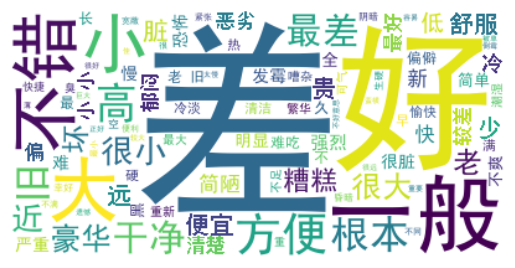

In [33]:
get_word_cloud(train_p_a)
get_word_cloud(train_n_a)

In [35]:
import torch
import torch.nn.functional as F


def padding(x_train, cut_len):
    x_train = [seq[:cut_len] for seq in x_train]
    padded = [F.pad(torch.tensor(seq, dtype=torch.long), (0, cut_len - len(seq)), value=0) for seq in x_train]
    return torch.stack(padded)  

x_train = [[1, 23, 5, 32, 55, 63, 2, 21, 78, 32, 23, 1],
           [2, 32, 1, 23, 1]]

res = padding(x_train, 10)
print(res)

tensor([[ 1, 23,  5, 32, 55, 63,  2, 21, 78, 32],
        [ 2, 32,  1, 23,  1,  0,  0,  0,  0,  0]])
